In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Usman\Downloads\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.drop(["area_type","availability","society","balcony"],axis=1,inplace=True)

In [4]:
df.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [5]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df.dropna(subset=["location","size"],inplace=True)

In [7]:
df[["bath"]]=df[["bath"]].fillna(0,axis=1)

In [8]:
df.isnull().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [9]:
df.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [10]:
df.loc[df["bath"]==40]

,location,size,total_sqft,bath,price
4684,Munnekollal,43 Bedroom,2400,40.0,660.0


In [11]:
df["size"].unique()
#bhk and bedroom are similar thing

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df["BHK"]=df["size"].apply(lambda x: int(x.split(" ")[0]))

In [13]:
df.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [14]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[~df["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,0.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,0.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2


In [17]:
def convert_sqftrange(x):
    token=x.split("-")
    if(len(token)==2):
        return(float(token[0])+float(token[1])/2)
    try:
        return float(x)
    except:
        return None

In [18]:
df["total_sqft"]=df["total_sqft"].apply(convert_sqftrange)

In [19]:
len(df)

13303

In [20]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [21]:
df = df[df.total_sqft.notnull()]
#now values are null because we return None in funtion

In [22]:
df.isnull().any()

location      False
size          False
total_sqft    False
bath          False
price         False
BHK           False
dtype: bool

In [23]:
len(df)

13257

In [24]:
df.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [25]:
df["price_per_sqft"]=df["price"]*100000/df["total_sqft"]
df.head(2)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [26]:
len(df)

13257

In [27]:
df.location=df.location.apply(lambda x: x.strip())

In [28]:
location_stats=df.location.value_counts(ascending=False)

In [29]:
location_stats

Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Maruthi nagar kogilu      1
Jagadish Nagar            1
Madanayakahalli           1
Arekempanahalli           1
Ashraya Layout            1
Name: location, Length: 1287, dtype: int64

In [30]:
location_stats.values.sum()

13257

In [31]:
len(location_stats)

1287

## Dimensionality Reduction

In [32]:
len(location_stats[location_stats>10])

240

In [33]:
location_stats_less_10=location_stats[location_stats<=10]

In [34]:
location_stats_less_10

Sadashiva Nagar         10
Nagadevanahalli         10
Ganga Nagar             10
Gunjur Palya            10
Sector 1 HSR Layout     10
                        ..
Maruthi nagar kogilu     1
Jagadish Nagar           1
Madanayakahalli          1
Arekempanahalli          1
Ashraya Layout           1
Name: location, Length: 1047, dtype: int64

In [35]:
df["location"]=df["location"].apply(lambda x: "other" if x in location_stats_less_10 else x)

In [36]:
df.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
#df.location.value_counts()
len(df.location.unique())

241

## Outlier remove

In [38]:
df[df.total_sqft/df.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
df.shape

(13257, 7)

In [40]:
df=df[~(df.total_sqft/df.BHK<300)]
df.shape

(12513, 7)

In [41]:
df.price_per_sqft.describe()

count     12513.000000
mean       6282.070788
std        4169.463545
min         267.829813
25%        4181.818182
50%        5274.725275
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,sub_df in df.groupby("location"):
        m=np.mean(sub_df.price_per_sqft)
        st=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(m-st)) & (sub_df.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df1=remove_pps_outlier(df)
df1.shape

(10269, 7)

In [43]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

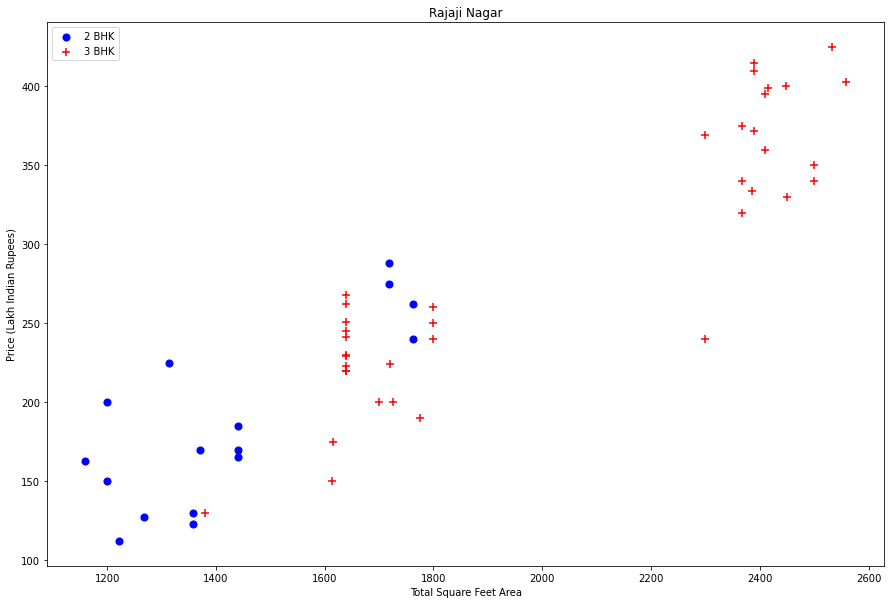

In [44]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="red",marker="+",label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df1,"Rajaji Nagar")

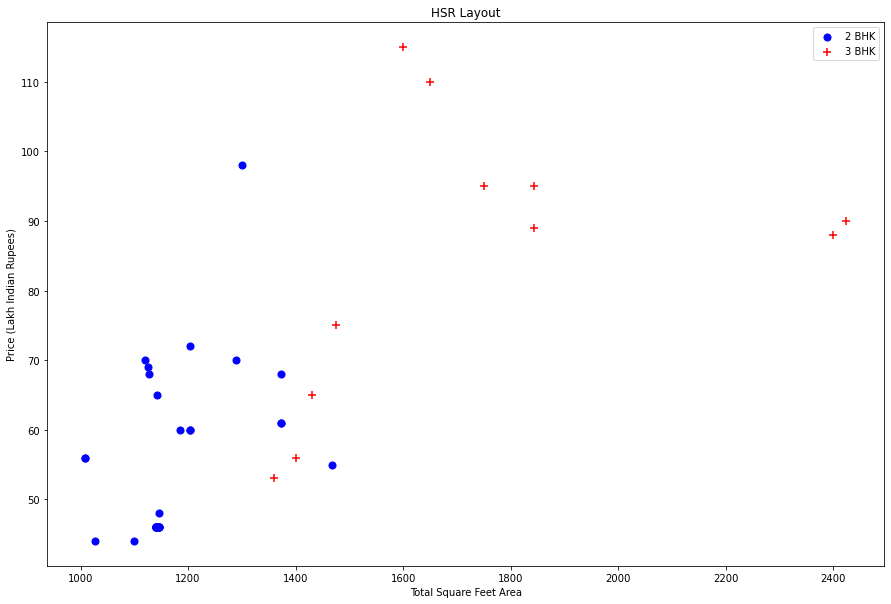

In [45]:
plot_scatter_chart(df1,"HSR Layout")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

#### {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
#### }
###  Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df2 = remove_bhk_outliers(df1)
# df2 = df1.copy()
df2.shape

(7326, 7)

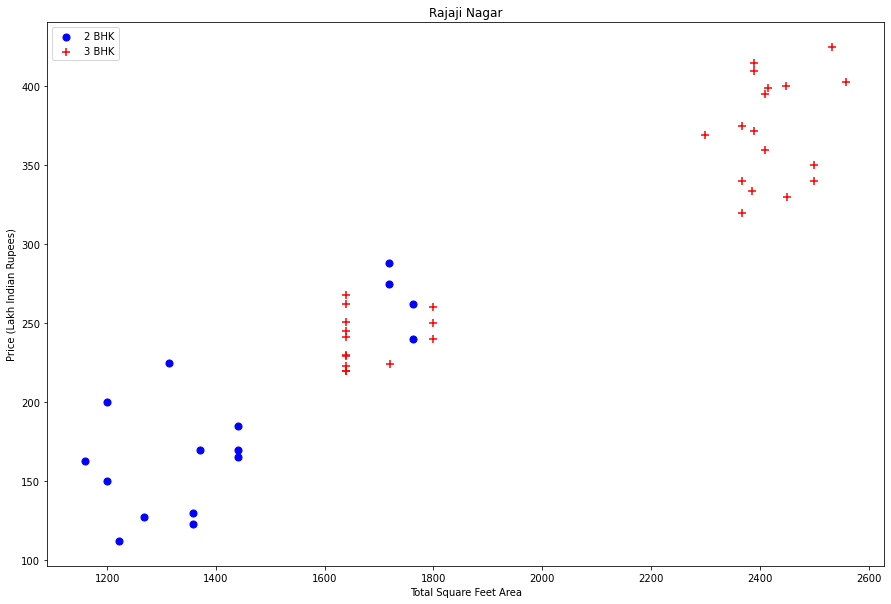

In [47]:
plot_scatter_chart(df2,"Rajaji Nagar")

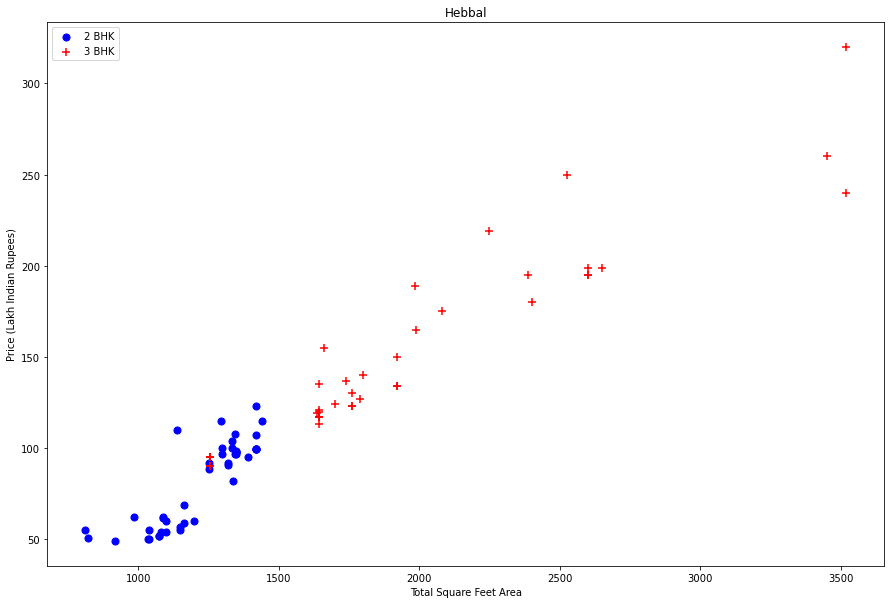

In [48]:
plot_scatter_chart(df2,"Hebbal")

Text(0, 0.5, 'Count')

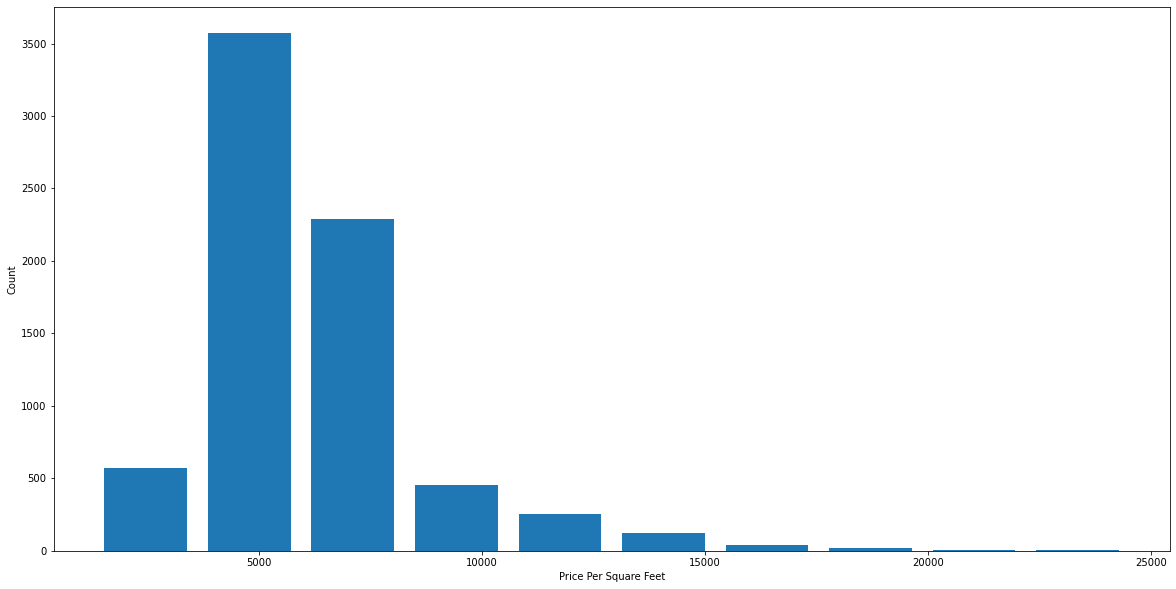

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [50]:
df2.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  0.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

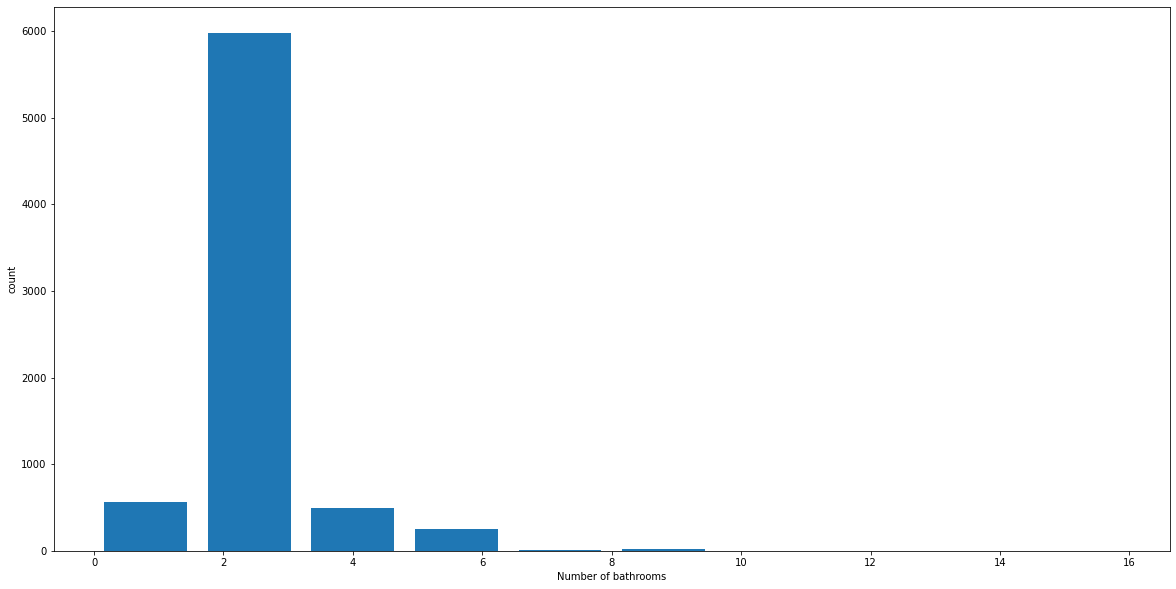

In [51]:
plt.hist(df2.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [52]:
df2[df2.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5299,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8509,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8598,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9332,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9663,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [53]:
df2[df2.bath>df2.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1629,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5260,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6739,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8434,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
df2=df2[df2.bath<df2.BHK+2]

In [55]:
df2.shape

(7252, 7)

### Now time to drop extra and those column which we create for data cleaning

In [56]:
df2 = df2.drop(['size','price_per_sqft'],axis='columns')
df2.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [57]:
Dummies=pd.get_dummies(df2.location)

In [58]:
Dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df3=pd.concat([df2,Dummies.drop("other",axis=1)],axis=1)
df3.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df3=df3.drop("location",axis=1)

In [61]:
df3.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df3.shape

(7252, 244)

In [63]:
X=df3.drop("price",axis=1)
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y=df3.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8547231830398188

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [68]:
s=ShuffleSplit(n_splits=6,test_size=0.2,random_state=0)

In [69]:
cross_val_score(LinearRegression(),X,y,cv=s)

array([0.79991317, 0.84079369, 0.77057308, 0.81753889, 0.86242091,
       0.85460535])

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def hyper_parameter(x,y):
    model_params={
        "LinearRegression":{
            "model":LinearRegression(),
            "params":{
            "normalize":[True,False]
        } 
    },
        "lasso":{
            "model":Lasso(),
            "params":{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        "DecissionTree":{
            "model":DecisionTreeRegressor(),
            "params":{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    ss=ShuffleSplit(n_splits=7,test_size=0.2,random_state=0)
    for model_name,mp in model_params.items():
        gs=GridSearchCV(mp["model"],mp["params"],return_train_score=False,cv=ss)
        gs.fit(X,y)
        scores.append({
            "model_name":model_name,
            "best Parameter":gs.best_params_,
            "best score":gs.best_score_
        })
    return pd.DataFrame(scores,columns=["model_name","best Parameter","best score"])

In [71]:
hyper_parameter(X,y)

,model_name,best Parameter,best score
0,LinearRegression,{'normalize': False},0.817770
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.679587
2,DecissionTree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.703786


## According to above table we can easily identify that the best ALgorithm is Linear Regression

### now we are making a funtion to predict price with our previously fit model

In [72]:
def predict_function(location,sqft,bath,bhk):
    index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if index>=0:
        x[index]=1
    return model.predict([x])[0]

In [73]:
predict_function("1st Block Jayanagar",1400,1,2)

230.33138578878408

In [74]:
predict_function("1st Phase JP Nagar",1000,2,2)

84.29605784527173

### Now we use pickle method to save our learning in file for future prediction on autual data

In [75]:
import pickle
with open("house price predicetion model","wb") as f:
    pickle.dump(model,f)

In [77]:
import json
columns={
    "Data_columns":[col.lower() for col in X.columns]
}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))